In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi * 2, 0.1)
# 정답 준비
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # -1.0 ~ 1.0
n_data = len(correct_data)

In [3]:
n_in = 1
n_mid = 5
n_out = 1

In [4]:
wb_width = 0.01
eta = 0.1
epoch = 2001
# epoch 200번마다 상태를 찍어볼예정
interval = 200

In [5]:
# 은닉층 클래스 설정
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    # 순전파 forward
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b 
        self.y = 1 / (1 + np.exp(-u)) # sigmoid 함수
        
    # 역전파 backward
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y # sigmoid 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
# 출력층 클래스
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    # 순전파 forward
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b 
        self.y = u # 항등함수
        
    # 역전파 backward
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

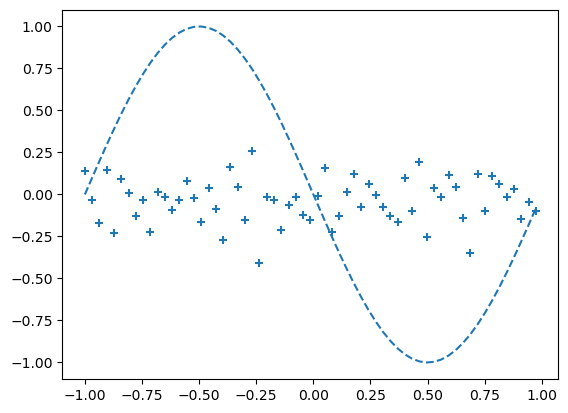

Epoch : 0/2001Error : 0.2665421742456717


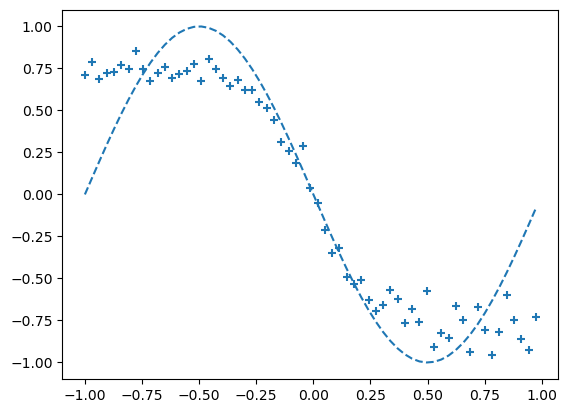

Epoch : 200/2001Error : 0.03840618452789036


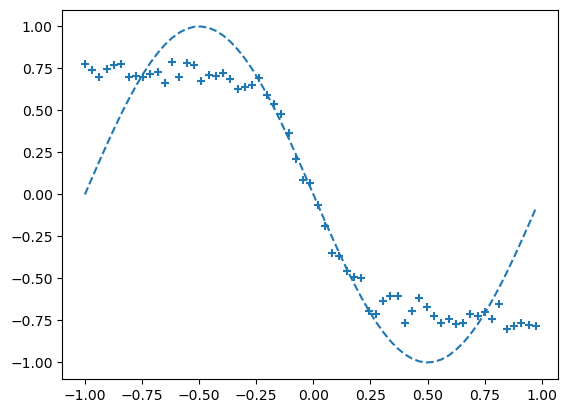

Epoch : 400/2001Error : 0.03686955009481784


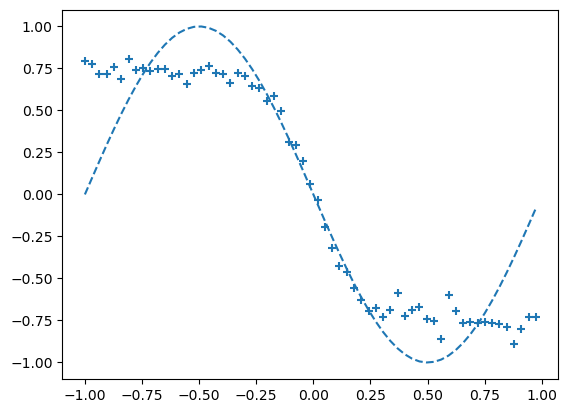

Epoch : 600/2001Error : 0.03679766726901573


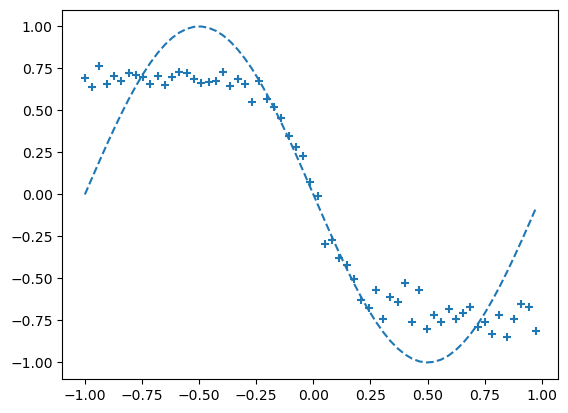

Epoch : 800/2001Error : 0.035704215339540595


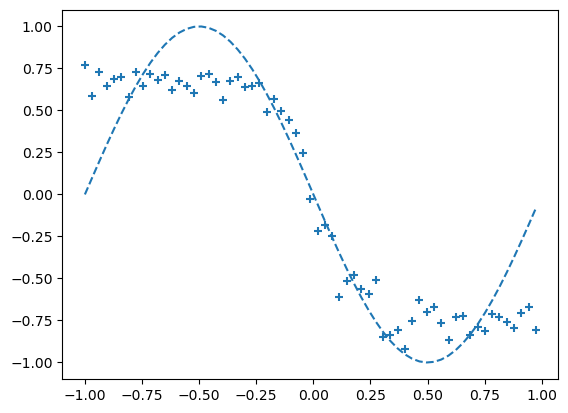

Epoch : 1000/2001Error : 0.03513492669789371


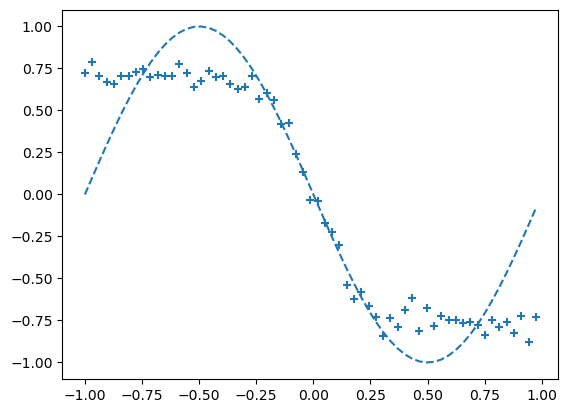

Epoch : 1200/2001Error : 0.03541779703894997


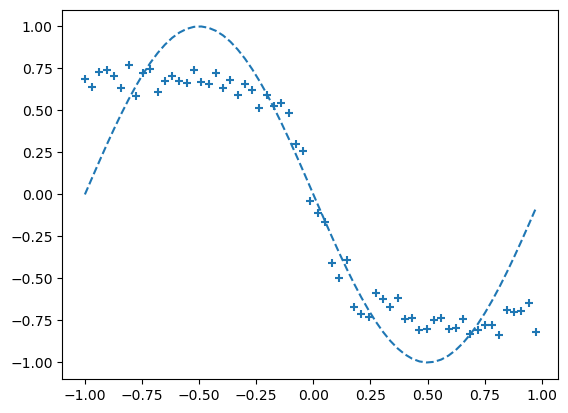

Epoch : 1400/2001Error : 0.03397481271806817


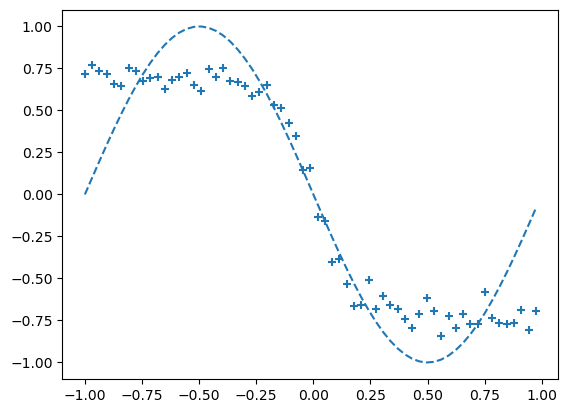

Epoch : 1600/2001Error : 0.035806753678108566


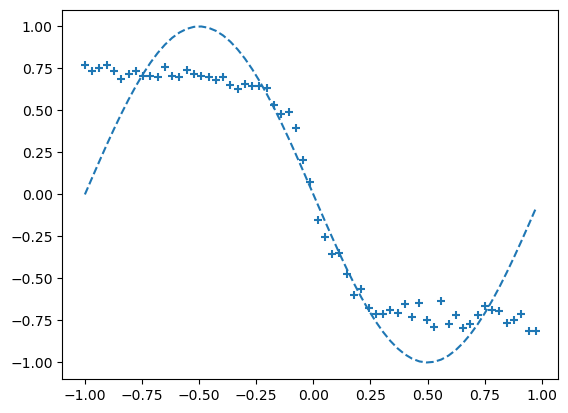

Epoch : 1800/2001Error : 0.03696945185636608


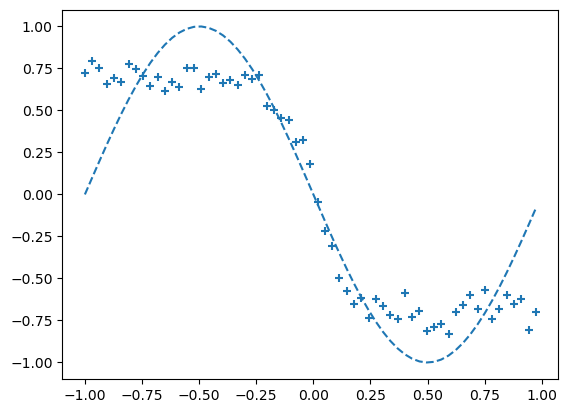

Epoch : 2000/2001Error : 0.03460749569927376


In [8]:
# SGD 방식을 사용하여 학습 시작
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        # 순전파 진행
        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)
        
        # 역전파 진행
        output_layer.backward(t.reshape(1, 1))
        middle_layer.backward(output_layer.grad_x)
        
        # 업데이트 진행
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) # -1 은 1차원으로 바꾸는데, 차원갯수는 알아서 맞추라는 소리
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t)) # 오차 제곱합으로
            
            # 위치 기록
            plot_x.append(x)
            plot_y.append(y)
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle = "dashed")
        plt.scatter(plot_x, plot_y, marker = '+')
        plt.show()
        
        # epoch와 오차 표시
        print('Epoch : ' + str(i) + '/' + str(epoch) + 'Error : ' + str(total_error / n_data))